In [2]:
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
%matplotlib inline 

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



import scipy
from scipy import stats

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df=pd.read_csv('train.csv')


In [4]:
df2=pd.read_csv('test.csv')

In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
df['blue'].replace({1: 'Yes', 0: 'No'}, inplace=True)
df['dual_sim'].replace({1: 'Yes', 0: 'No'}, inplace=True)
df['four_g'].replace({1: 'Yes', 0: 'No'}, inplace=True)
df['three_g'].replace({1: 'Yes', 0: 'No'}, inplace=True)
df['touch_screen'].replace({1: 'Yes', 0: 'No'}, inplace=True)
df['wifi'].replace({1: 'Yes', 0: 'No'}, inplace=True)
df['price_range'].replace({0:'Low_Cost', 1: 'Medium_Cost',2:'High_Cost',3:'Very_High_Cost'}, inplace=True)

In [7]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,No,2.2,No,1,No,7,0.6,188,2,...,20,756,2549,9,7,19,No,No,Yes,Medium_Cost
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,3,...,905,1988,2631,17,3,7,Yes,Yes,No,High_Cost
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,Yes,Yes,No,High_Cost
3,615,Yes,2.5,No,0,No,10,0.8,131,6,...,1216,1786,2769,16,8,11,Yes,No,No,High_Cost
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,2,...,1208,1212,1411,8,2,15,Yes,Yes,No,Medium_Cost


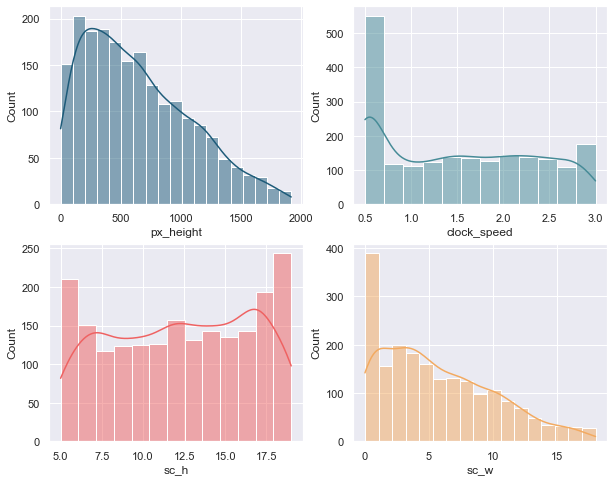

In [86]:
fig, ax = plt.subplots(2,2, figsize=(10, 8))

sns.histplot(data=df, x="px_height", kde=True, ax=ax[0, 0], color='#1D5B79')
sns.histplot(data=df, x="clock_speed", kde=True, ax=ax[0, 1], color='#468B97')
sns.histplot(data=df, x="sc_h", kde=True, ax=ax[1, 0], color='#EF6262')
sns.histplot(data=df, x="sc_w", kde=True, ax=ax[1, 1], color='#F3AA60');

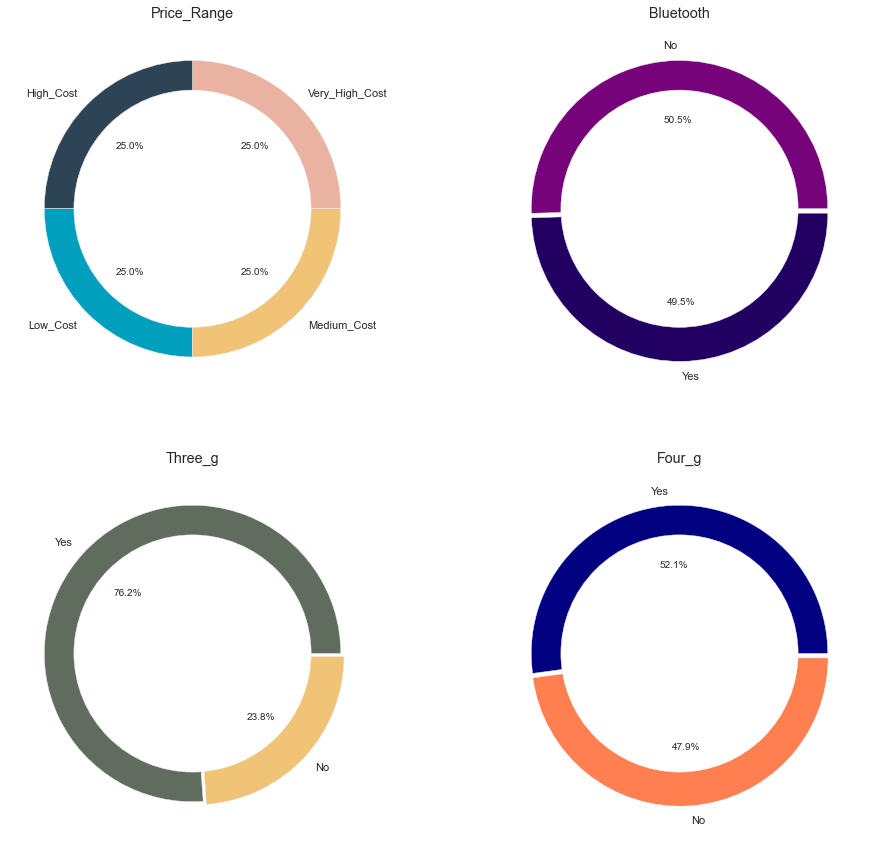

In [107]:
plt.figure(figsize=(16, 15))
plt.subplot(2, 2, 1)
plt.pie(x=df['price_range'].value_counts(),labels=['Very_High_Cost',"High_Cost","Low_Cost","Medium_Cost"],explode=[0,0,0,0],shadow=False,autopct='%1.1f%%',colors=['#EAB2A0','#2D4356','#009FBD','#F1C376'])
plt.title('Price_Range')
circle = plt.Circle(xy=(0,0),radius=0.8,facecolor = 'white')
plt.gca().add_artist(circle)


plt.subplot(2, 2, 2)
plt.pie(x=df['blue'].value_counts(),labels=['No','Yes'],explode=[0,0.03],shadow=False,autopct='%1.1f%%',colors=['#77037B','#210062','#009FBD'])
plt.title('Bluetooth')
circle = plt.Circle(xy=(0,0),radius=0.8,facecolor = 'white')
plt.gca().add_artist(circle)


plt.subplot(2, 2, 3)
plt.pie(x=df['three_g'].value_counts(),labels=['Yes',"No"],explode=[0,0.03],shadow=False,autopct='%1.1f%%',colors=['#606C5D','#F1C376'])
plt.title('Three_g')
circle = plt.Circle(xy=(0,0),radius=0.8,facecolor = 'white')
plt.gca().add_artist(circle)

plt.subplot(2, 2, 4)
plt.style.use('ggplot')
plt.pie(x=df['four_g'].value_counts(),labels=['Yes',"No"],explode=[0,0.03],shadow=False,autopct='%1.1f%%',colors=['#000080','#FF7F50'])
plt.title('Four_g')
circle = plt.Circle(xy=(0,0),radius=0.8,facecolor = 'white')
plt.gca().add_artist(circle)

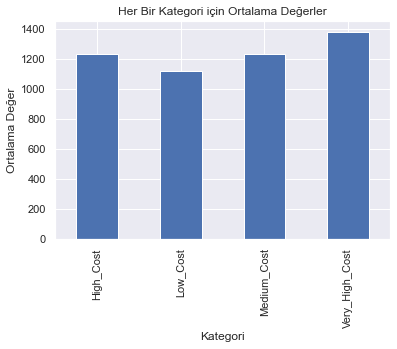

In [88]:
category_means=df.groupby('price_range')['battery_power'].mean()
category_means.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Average')
plt.title('Average For Per Category')
plt.show()

In [28]:
numeric= df.select_dtypes(include=['number'])

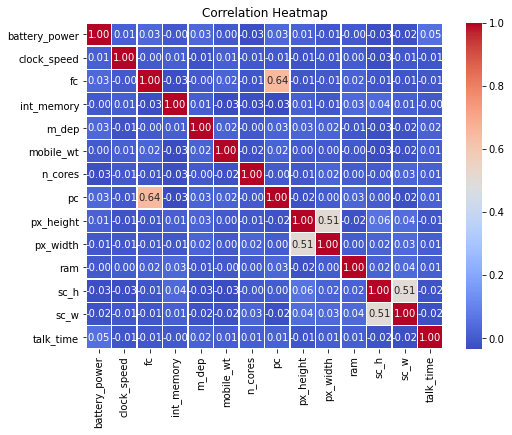

In [29]:
corr_plot = numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_plot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<AxesSubplot:>

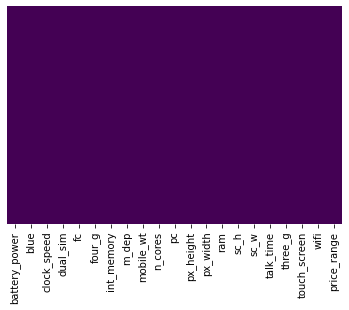

In [71]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
def find_outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

outliers = find_outliers(df['px_height'])

print('The number of outliers: '+ str(len(outliers)))

print('Max outlier value: '+ str(outliers.max()))

print('Min outlier value: ' + str(outliers.min()))

The number of outliers: 2
Max outlier value: 1960
Min outlier value: 1949


In [43]:
def impute_outliers(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    upper = df[~(df>(q3+1.5*IQR))].max()

    lower = df[~(df<(q1-1.5*IQR))].min()

    df = np.where(df > upper,

       df.mean(),

       np.where( df < lower,df.mean(),df)

       )

    return df

In [44]:
df['fc'] = impute_outliers(df['fc'])
df['px_height'] = impute_outliers(df['px_height'])

In [45]:
X=df.drop('price_range',axis=1)
y=df['price_range']

In [46]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [47]:
numeric_transformer = MinMaxScaler()

In [48]:
categorical_transformer = OneHotEncoder(drop="first", sparse=False)

In [49]:
preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])
X_processed = preprocessor.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [51]:
logmodel=LogisticRegression()
logmodel=logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)
logmodel_accuracy=accuracy_score(y_test,predictions).round(2)

In [52]:
rf1_model=RandomForestClassifier().fit(X_train,y_train)
y_pred_rf=rf1_model.predict(X_test)
rf_accuracy=accuracy_score(y_test,y_pred_rf).round(2)

In [53]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_gbm= gbm_model.predict(X_test)
gbm_accuracy=accuracy_score(y_test, y_pred_gbm).round(3)

In [54]:
dt1_model = DecisionTreeClassifier().fit(X_train,y_train)
y_pred_dt1=dt1_model.predict(X_test)
dt1_accuracy=accuracy_score(y_test,y_pred_dt1).round(2)

In [55]:
knn_model1= KNeighborsClassifier().fit(X_train,y_train)
knn_model_pred=knn_model1.predict(X_test)
knn_accuracy=accuracy_score(y_test,knn_model_pred).round(2)

In [56]:
mlp_model1= MLPClassifier(random_state=42).fit(X_train,y_train)
mlp_model_pred=mlp_model1.predict(X_test)
mlp_accuracy=accuracy_score(y_test,mlp_model_pred).round(2)

In [57]:
svm_model1= SVC().fit(X_train,y_train)
svm_pred=svm_model1.predict(X_test)
svm_accuracy=accuracy_score(y_test,svm_pred).round(2)

In [58]:
print("Accuracy for Logistic Regression Model:", logmodel_accuracy)
print("Accuracy for Random Forest Model:", rf_accuracy)
print("Accuracy for Gradient Boosting Model:", gbm_accuracy)
print("Accuracy for Decision Tree Model:", dt1_accuracy)
print("Accuracy for K-Nearest Neighbors Model:", knn_accuracy) 
print("Accuracy for Multi-layer Perceptron Model:", mlp_accuracy)
print("Accuracy for Support Vector Machine Model:", svm_accuracy)

Accuracy for Logistic Regression Model: 0.94
Accuracy for Random Forest Model: 0.88
Accuracy for Gradient Boosting Model: 0.902
Accuracy for Decision Tree Model: 0.82
Accuracy for K-Nearest Neighbors Model: 0.39
Accuracy for Multi-layer Perceptron Model: 0.95
Accuracy for Support Vector Machine Model: 0.86


In [59]:
lr_model = LogisticRegression()

rf_model = RandomForestClassifier()

gbc_model = GradientBoostingClassifier()

dt_model = DecisionTreeClassifier()

knn_model = KNeighborsClassifier()

mlp_model=MLPClassifier()

svm_model=SVC()

In [60]:
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

In [61]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [62]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

In [63]:
gbc_param_grid = {"learning_rate" : [0.001, 0.01,0.05],
             "n_estimators": [20,50,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [64]:
xgb_param_grid = {
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [10, 50, 100, 200, 300],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'subsample': [0.5, 0.8, 1.0],
}

In [65]:
knn_param_grid = {
    'n_neighbors': list(range(1, 30)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']
}

In [66]:
mlpc_param_grid={
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 500],
}

In [67]:
svm_param_grid={
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

In [68]:
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [69]:
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
lr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [70]:
gbc_grid_search = GridSearchCV(estimator=gbc_model, param_grid=gbc_param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
gbc_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 100]},
             scoring='accuracy', verbose=1)

In [71]:
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [72]:
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
knn_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3248 candidates, totalling 16240 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean',
                                    'mahalanobis'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [73]:
mlpc_grid_search = GridSearchCV(estimator=mlp_model, param_grid=mlpc_param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
mlpc_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [200, 500],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy', verbose=1)

In [74]:
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
svm_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [75]:
best_rf_model = rf_grid_search.best_estimator_
best_lr_model = lr_grid_search.best_estimator_
best_gbc_model = gbc_grid_search.best_estimator_
best_dt_model = dt_grid_search.best_estimator_
best_knn_model = knn_grid_search.best_estimator_
best_mlpc_model =mlpc_grid_search.best_estimator_
best_svm_model =svm_grid_search.best_estimator_

In [76]:
best_rf_model.fit(X_train, y_train)
best_lr_model.fit(X_train, y_train)
best_gbc_model.fit(X_train, y_train)
best_dt_model.fit(X_train, y_train)
best_knn_model.fit(X_train, y_train)
best_mlpc_model.fit(X_train, y_train)
best_svm_model.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [77]:
best_rf_y_pred = best_rf_model.predict(X_test)
best_lr_y_pred = best_lr_model.predict(X_test)
best_gbc_y_pred = best_gbc_model.predict(X_test)
best_dt_y_pred = best_dt_model.predict(X_test)
best_knn_y_pred = best_knn_model.predict(X_test)
best_mlpc_y_pred = best_mlpc_model.predict(X_test)
best_svm_y_pred = best_svm_model.predict(X_test)

In [78]:
best_rf_accuracy = accuracy_score(y_test, best_rf_y_pred)
best_lr_accuracy = accuracy_score(y_test, best_lr_y_pred)
best_gbc_accuracy = accuracy_score(y_test, best_gbc_y_pred)
best_dt_accuracy = accuracy_score(y_test, best_dt_y_pred)
best_knn_accuracy = accuracy_score(y_test, best_knn_y_pred)
best_mlpc_accuracy = accuracy_score(y_test,best_mlpc_y_pred)
best_svm_accuracy = accuracy_score(y_test,best_svm_y_pred)

print("Best Accuracy for Random Forest Model:", best_rf_accuracy)
print("Best Accuracy for Logistic Regression Model:", best_lr_accuracy)
print("Best Accuracy for Gradient Boosting Model:", best_gbc_accuracy )
print("Best Accuracy for Decision Tree Model:", best_dt_accuracy)
print("Best Accuracy for K-Nearest Neighbors Model:", best_knn_accuracy)
print("Best Accuracy for Multi-layer Perceptron Model:", best_mlpc_accuracy)
print("Best Accuracy for Support Vector Machine Model:", best_svm_accuracy)

Best Accuracy for Random Forest Model: 0.89
Best Accuracy for Logistic Regression Model: 0.9775
Best Accuracy for Gradient Boosting Model: 0.91
Best Accuracy for Decision Tree Model: 0.85
Best Accuracy for K-Nearest Neighbors Model: 0.61
Best Accuracy for Multi-layer Perceptron Model: 0.9775
Best Accuracy for Support Vector Machine Model: 0.97


In [79]:
compare = pd.DataFrame({'Model': ['Logistic Regression','Random Forest Classifier','GradientBoostingClassifier','DecisionTreeClassifier','KNeighborsClassifier','MLPClassifier','Support Vector Machine'
], 
                        'Accuracy': [logmodel_accuracy*100, rf_accuracy*100, gbm_accuracy*100, 
                                     dt1_accuracy*100, knn_accuracy*100,mlp_accuracy*100,svm_accuracy*100],
                        
                        'Tuned Accuracy': [best_lr_accuracy*100, best_rf_accuracy*100, best_gbc_accuracy*100, 
                                     best_dt_accuracy *100, best_knn_accuracy*100,best_mlpc_accuracy*100,best_svm_accuracy*100]})

compare.sort_values(by='Tuned Accuracy', ascending=False)

,Model,Accuracy,Tuned Accuracy
0,Logistic Regression,94.0,97.75
5,MLPClassifier,95.0,97.75
6,Support Vector Machine,86.0,97.00
2,GradientBoostingClassifier,90.2,91.00
1,Random Forest Classifier,88.0,89.00
3,DecisionTreeClassifier,82.0,85.00
4,KNeighborsClassifier,39.0,61.00


In [80]:
df2.drop('id',axis=1,inplace=True)

In [82]:
test_result=best_rf_model.predict(df2)
test_accuracy=accuracy_score(y_test, best_rf_y_pred)
print("Test Sample Accuracy:",test_accuracy)

Test Sample Accuracy: 0.89
